In [1]:
import tensorflow as tf
import numpy as np
import sklearn.model_selection
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
#identfying categories , labels , paths
categories = ['NORMAL','COVID']
label_dic = {}
for i in range (2) : 
    label_dic[categories[i]]=i


In [3]:
#reading images from the directory  
Dataset=[]
for category in categories :
    path='datasets'+'/'+category
    imagenames = os.listdir(path)
    for imagename in imagenames :
        imagepath=path+'/'+imagename
        img = cv.imread(imagepath)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        Dataset.append([cv.resize(gray,(128,128)),label_dic[category]])



In [4]:
#idenfying the inputs and the desired outputs
from random import shuffle 
shuffle(Dataset)
data =[]
target = []
for feature , label in Dataset:
    data.append(feature)
    target.append(label)

In [5]:
#normalizing the data , and shapes so it fits the convolution layer
data=np.array(data)/255.0 
target = np.array(target)
print(data.shape)
data =np.reshape(data, (data.shape[0],128,128,1) )
print(data.shape)
print(target.shape) 
target=tf.keras.utils.to_categorical(target)

(5856, 128, 128)
(5856, 128, 128, 1)
(5856,)


In [6]:
#implementing the CNN model
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))


In [7]:
#generating train and test sets
train_data,test_data,train_target,test_target=sklearn.model_selection.train_test_split(data,target,test_size=0.1)


In [8]:
#compiling the models and fitting the data
model.compile(loss='binary_crossentropy', optimizer='adam',metrics='accuracy')
model.fit(train_data,train_target,epochs=12,batch_size=1)

Epoch 1/12
5270/5270 [==============================] - 128s 24ms/step - loss: 0.3793 - accuracy: 0.8406
Epoch 2/12
5270/5270 [==============================] - 135s 26ms/step - loss: 0.2403 - accuracy: 0.9108
Epoch 3/12
5270/5270 [==============================] - 136s 26ms/step - loss: 0.2190 - accuracy: 0.9194
Epoch 4/12
5270/5270 [==============================] - 135s 26ms/step - loss: 0.2028 - accuracy: 0.9302
Epoch 5/12
5270/5270 [==============================] - 135s 26ms/step - loss: 0.1870 - accuracy: 0.9326
Epoch 6/12
5270/5270 [==============================] - 134s 25ms/step - loss: 0.1751 - accuracy: 0.9342
Epoch 7/12
5270/5270 [==============================] - 136s 26ms/step - loss: 0.1839 - accuracy: 0.9351
Epoch 8/12
5270/5270 [==============================] - 135s 26ms/step - loss: 0.1813 - accuracy: 0.9395
Epoch 9/12
5270/5270 [==============================] - 137s 26ms/step - loss: 0.1766 - accuracy: 0.9410
Epoch 10/12
5270/5270 [==============================] 

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
loss = np.array([[1,0.3799] , [2,0.2403] , [3,0.2190],[4,0.2028],[5,0.1870],[6,0.1751]
                ,[7,0.1839],[8,0.1813],[9,0.1766],[10,0.1751],[11,0.1614],[12,0.1777]])
accuracy = np.array([[1,0.8406] , [2,0.9108] , [3,0.9194],[4,0.9302],[5,0.9326],[6,0.9342]
                    ,[7,0.9351],[8,0.9395],[9,0.9410],[10,0.9376],[11,0.9402],[12,0.9414]])

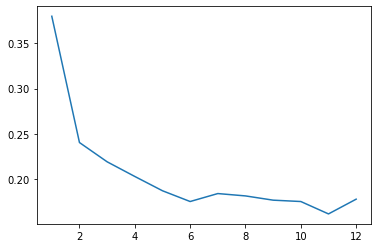

In [10]:
plt.plot(loss[:,0],loss[:,1])

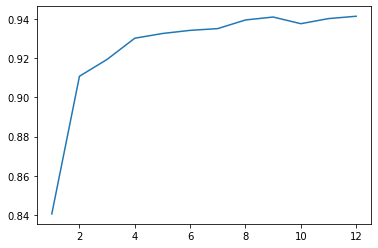

In [11]:
plt.plot(accuracy[:,0],accuracy[:,1])

In [9]:
#model evaluation
val_loss,val_acc=model.evaluate(test_data , test_target  )
print('loss=',val_loss,'accuarcy=',val_acc*100,'%')

19/19 [==============================] - 1s 60ms/step - loss: 0.1346 - accuracy: 0.9608
loss= 0.13455206155776978 accuarcy= 96.07508778572083 %


Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


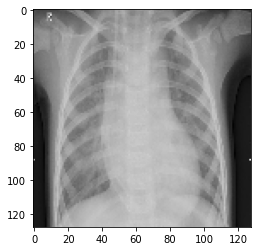

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


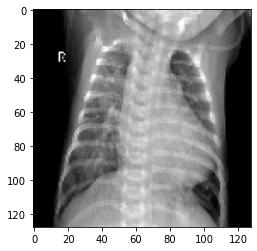

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


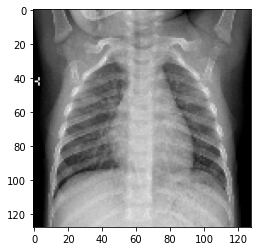

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


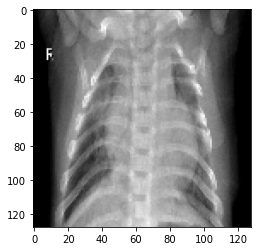

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


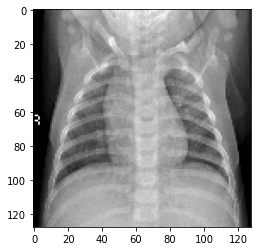

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


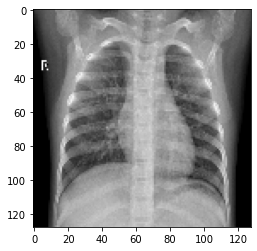

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


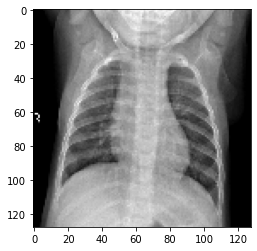

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


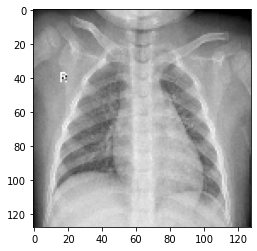

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


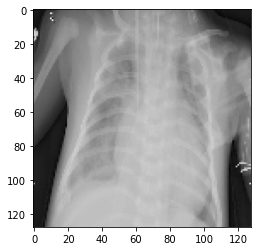

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


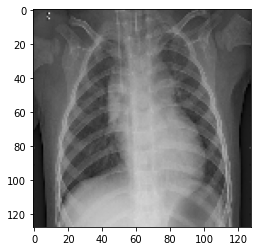

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


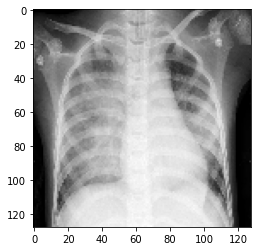

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


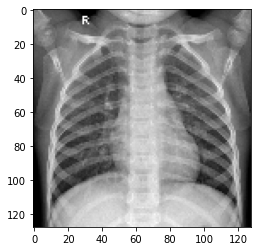

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


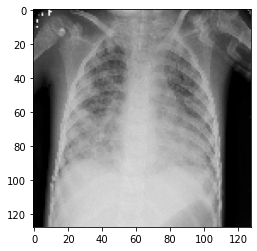

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


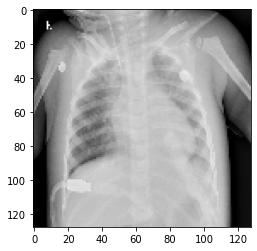

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


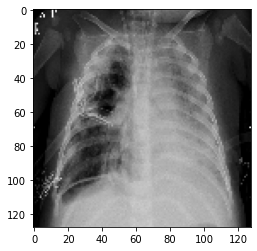

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


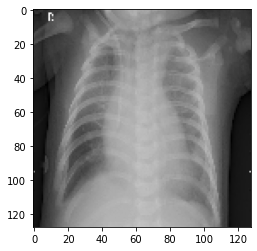

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


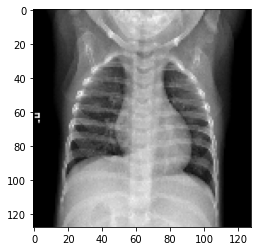

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


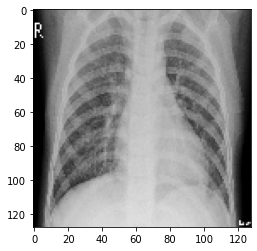

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


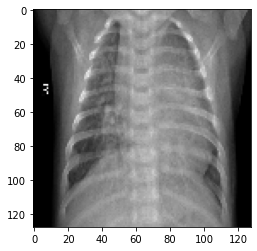

Model Predicts The Patient have Covid The Actual Result is that The Patient is Normal


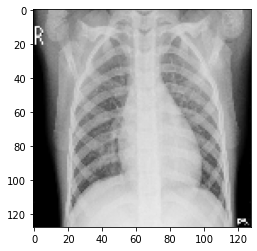

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


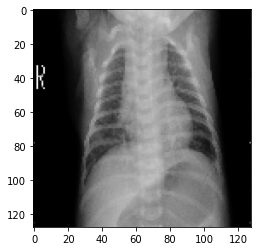

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


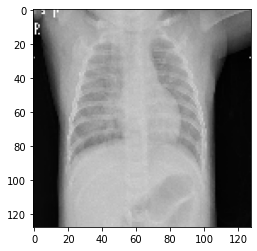

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


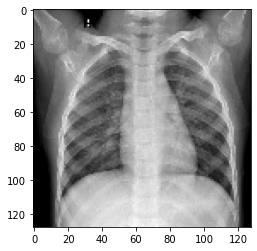

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


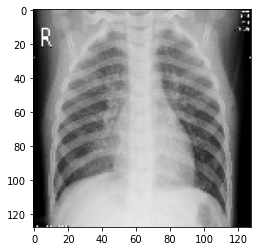

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


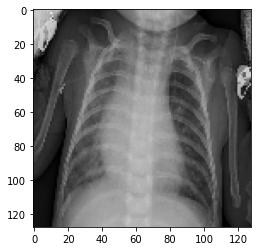

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


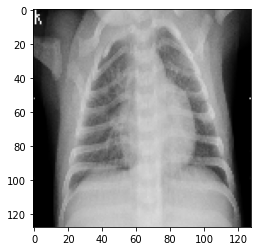

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


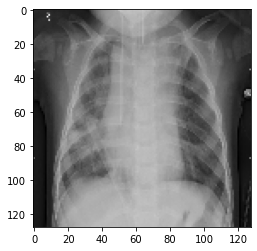

Model Predicts The Patient have Covid The Actual Result is that The Patient is Normal


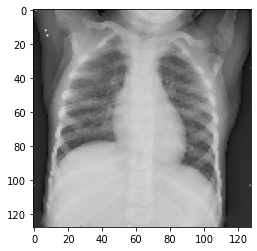

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


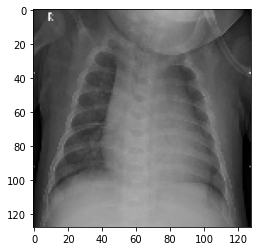

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


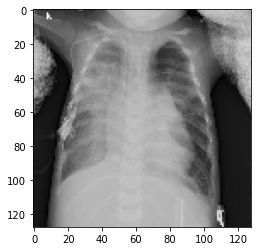

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


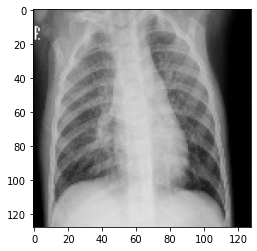

Model Predicts The Patient is Normal The Actual Result is that The Patient have Covid


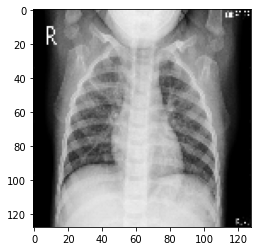

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


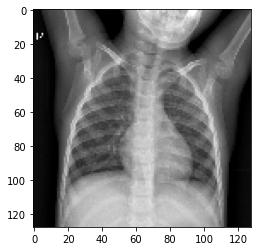

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


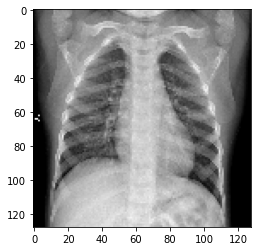

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


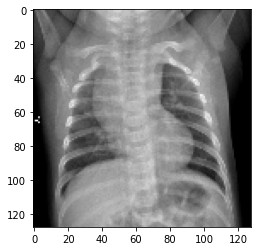

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


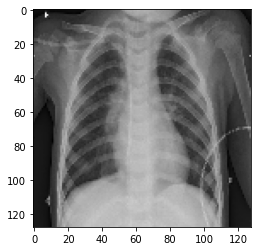

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


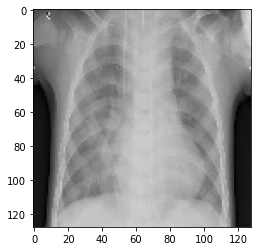

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


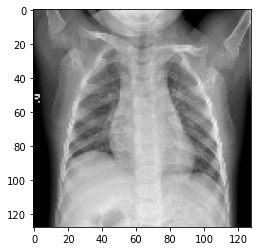

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


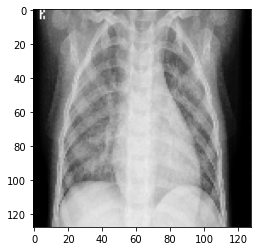

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


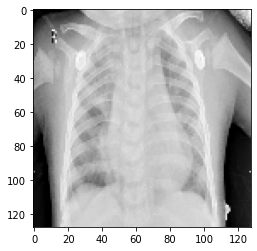

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


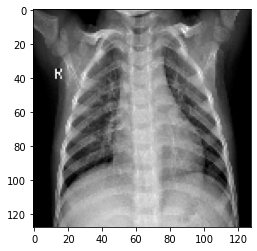

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


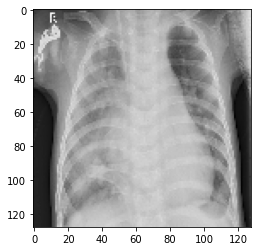

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


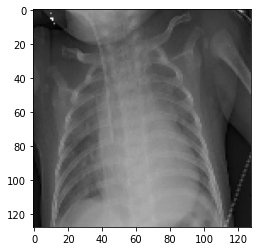

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


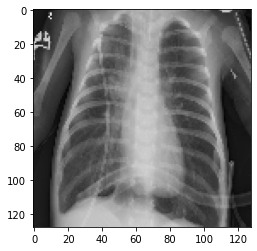

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


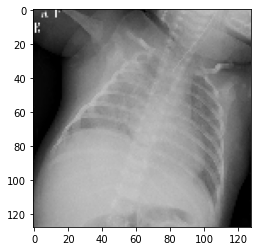

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


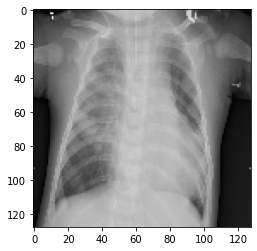

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


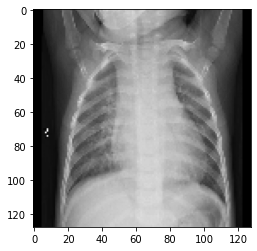

Model Predicts The Patient is Normal The Actual Result is that The Patient is Normal


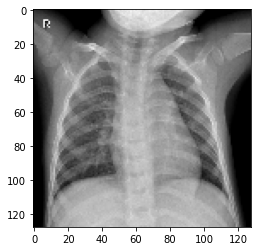

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


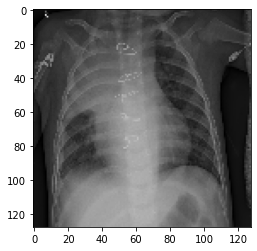

Model Predicts The Patient have Covid The Actual Result is that The Patient have Covid


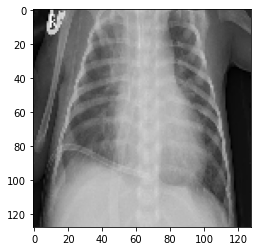

In [23]:
#visualizing a sample from the predictions against targeted output
predictions = model.predict(test_data)
for i in range (50):
    plt.imshow(test_data[i],cmap='gray') 
    predict = np.argmax(predictions[i]) 
    if predict ==0 : 
        prediction = 'is Normal' 
    else :
        prediction='have Covid'
        
    if test_target[i][0]==1.0 :
        actual_answer='is Normal' 
    else : 
        actual_answer='have Covid'
    print('Model Predicts The Patient' , prediction , 'The Actual Result is that The Patient',actual_answer)
    plt.show()